In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scipy
import statsmodels.api as sm
import folium
%matplotlib inline
sns.set()

In [2]:
#Import Data
constructor = pd.read_csv('constructors_full.csv')

In [3]:
#Analysis of Constructor Data
constructor.head()

,Unnamed: 0,raceId,constructorId,points,position,wins,constructorRef,nationality,year,round,circuitId,name_y,date,circuitRef,location,country,lat,lng
0,0,18,1,14.0,1,1,mclaren,British,2008,1,1,Australian Grand Prix,3/16/2008,albert_park,Melbourne,Australia,-37.8497,144.968
1,1,18,2,8.0,3,0,bmw_sauber,German,2008,1,1,Australian Grand Prix,3/16/2008,albert_park,Melbourne,Australia,-37.8497,144.968
2,2,18,3,9.0,2,0,williams,British,2008,1,1,Australian Grand Prix,3/16/2008,albert_park,Melbourne,Australia,-37.8497,144.968
3,3,18,4,5.0,4,0,renault,French,2008,1,1,Australian Grand Prix,3/16/2008,albert_park,Melbourne,Australia,-37.8497,144.968
4,4,18,5,2.0,5,0,toro_rosso,Italian,2008,1,1,Australian Grand Prix,3/16/2008,albert_park,Melbourne,Australia,-37.8497,144.968


In [4]:
#Looking at country data
by_country = constructor.groupby('country')['raceId'].nunique()
country_df = by_country.rename_axis('country').reset_index(name='races')
country_df = country_df.sort_values(['races']).reset_index(drop=True)

In [5]:
# of Countries that have participated in F1
country_df['country'].count()

31

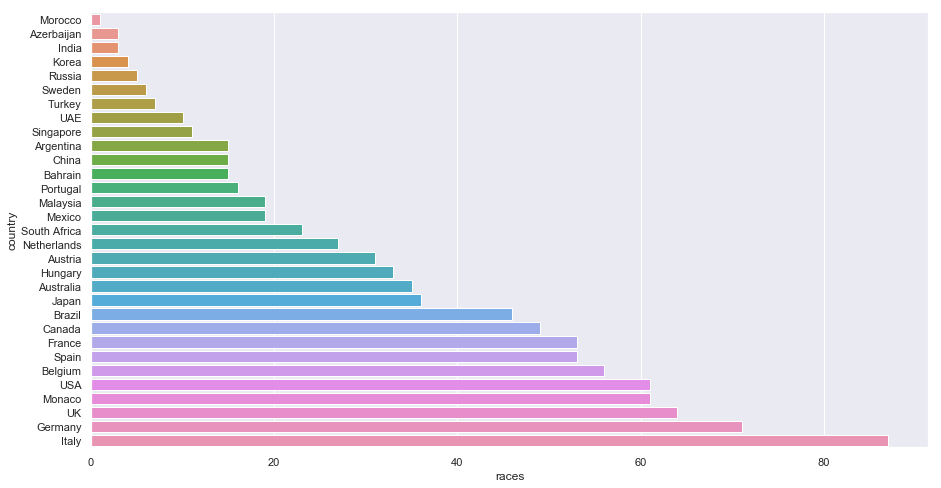

In [6]:
# How many races have been held in each participating country?
plt.figure(figsize=(15,8))
sns.barplot(y='country', x='races', data=country_df);

In [7]:
#Looking at Constructors
by_constructor = constructor.groupby('constructorRef')['raceId'].nunique()
constructor_df = by_constructor.rename_axis('constructor').reset_index(name='races')
constructor_df = constructor_df.sort_values(['races'], ascending=False).reset_index(drop=True)

In [8]:
#How many constructors have participated in F1?
constructor_df['constructor'].count()

157

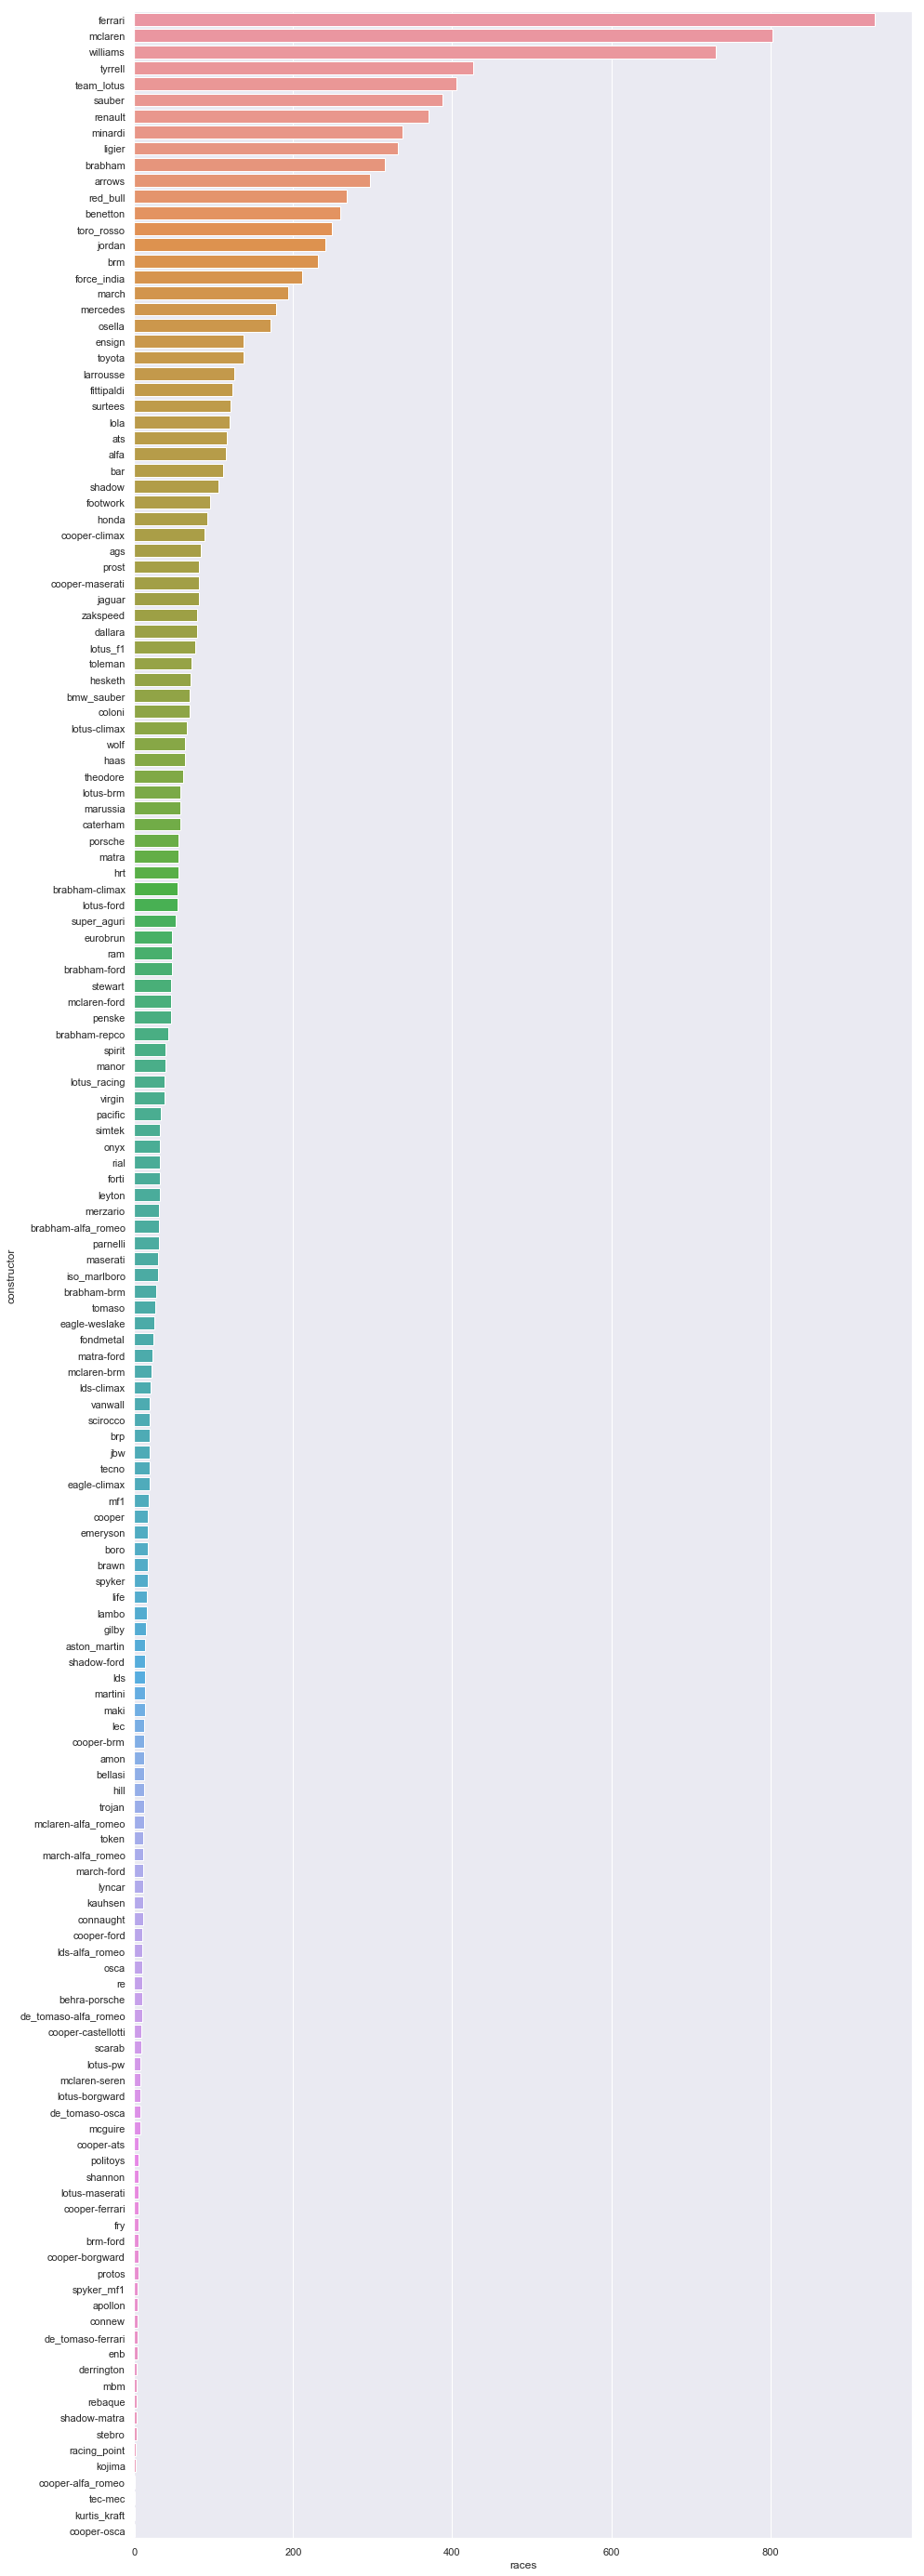

In [9]:
# How many races has each constructor participated in?
plt.figure(figsize=(15,50))
sns.barplot(y='constructor', x='races', data=constructor_df);

In [10]:
# Nationalities of Constructors
by_nationality = constructor.groupby('nationality')['raceId'].nunique()
nationality_df = by_nationality.rename_axis('nationality').reset_index(name='races')
nationality_df = nationality_df.sort_values(['races'], ascending=True).reset_index(drop=True)

In [11]:
#How many nattionalities have cobnstrcutors that have participated in F1?
nationality_df['nationality'].count()

23

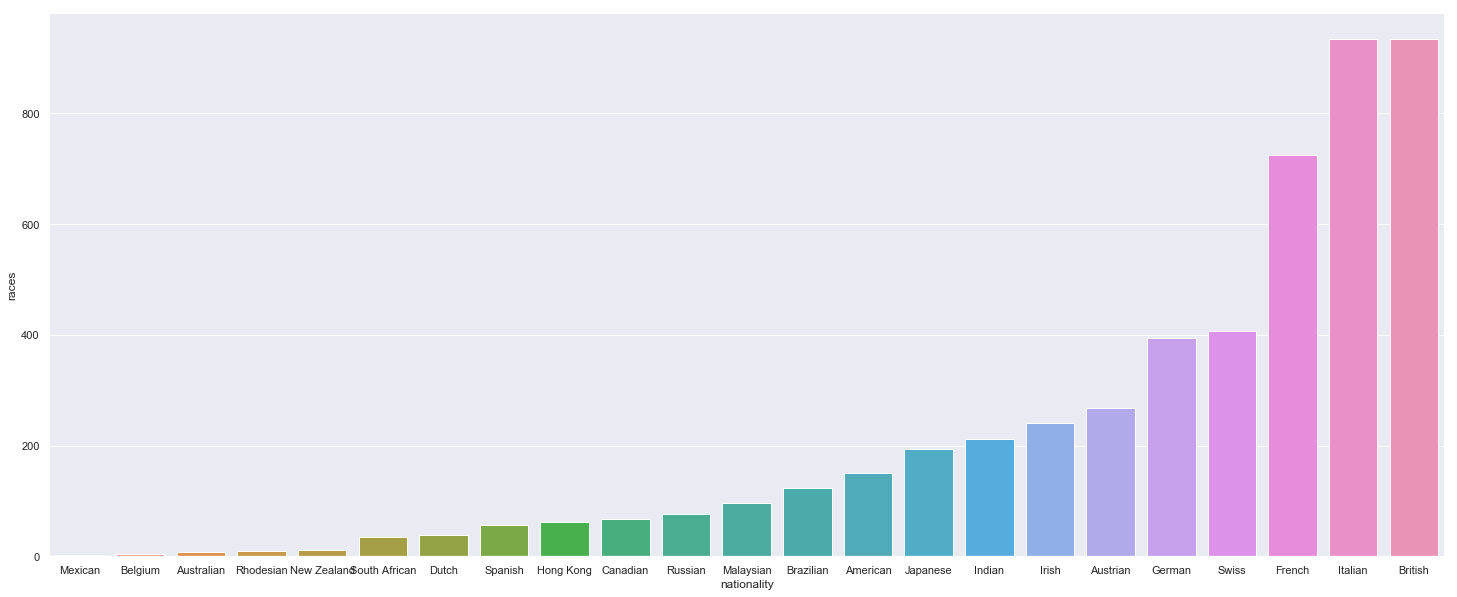

In [12]:
# Which countries have constructors represented and in how many races?
plt.figure(figsize=(25,10))
sns.barplot(x='nationality', y='races', data=nationality_df);

In [13]:
#Looking at Race Circuits
by_circuit = constructor.groupby('circuitRef')['raceId'].nunique()
circuit_df = by_circuit.rename_axis('circuit').reset_index(name='races')
circuit_df = circuit_df.sort_values(['races'], ascending=False).reset_index(drop=True)

In [14]:
# At how many circuits have races been held?
circuit_df['circuit'].count()

69

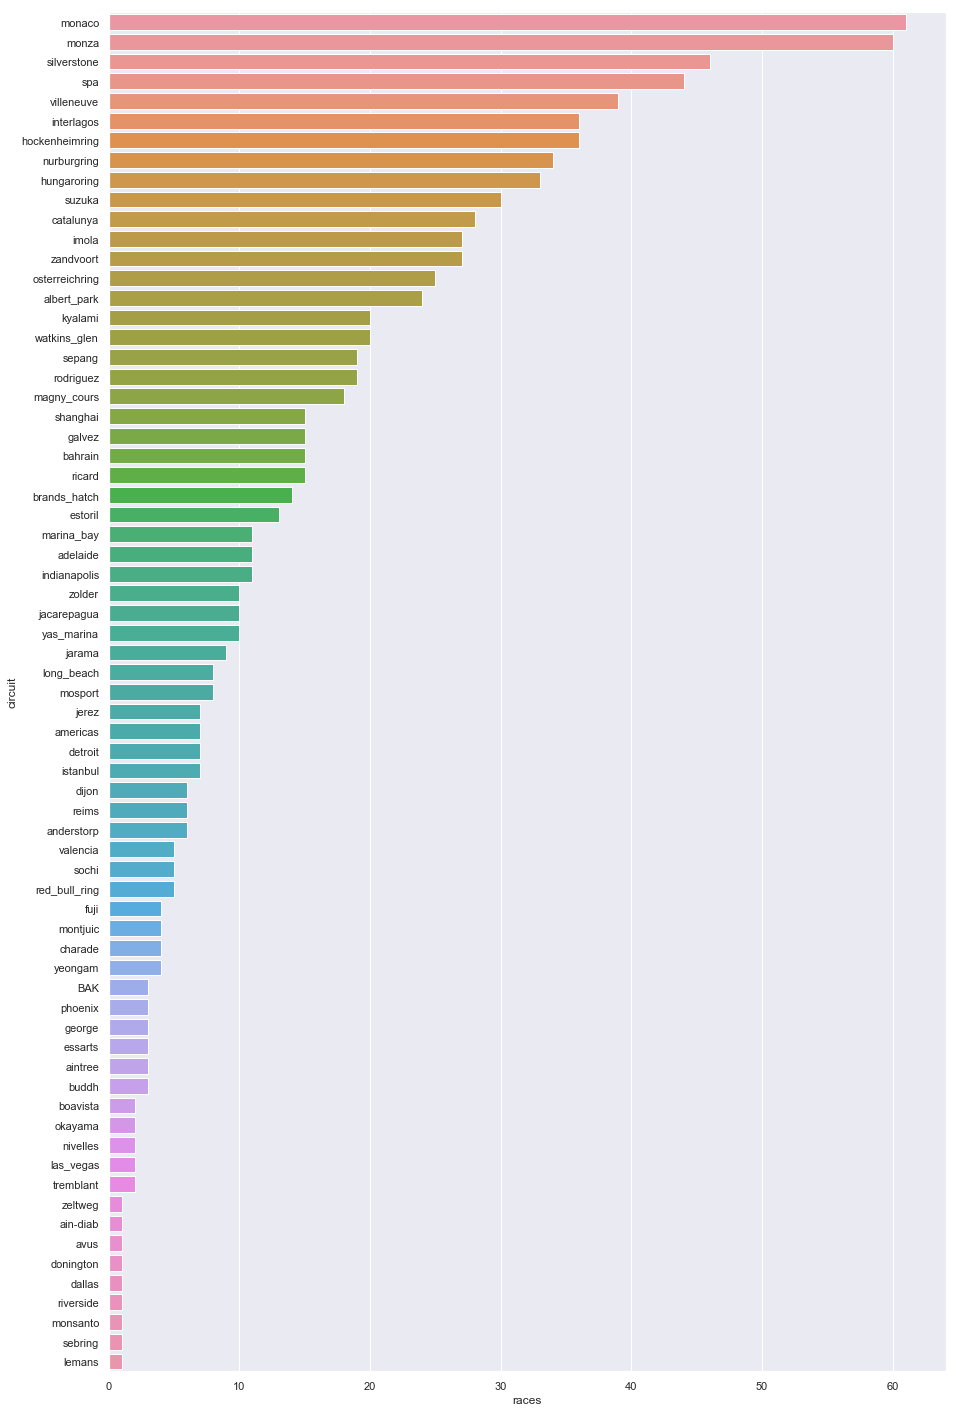

In [15]:
#How many races have been held at each circuit
plt.figure(figsize=(15,25))
sns.barplot(y='circuit', x='races', data=circuit_df);

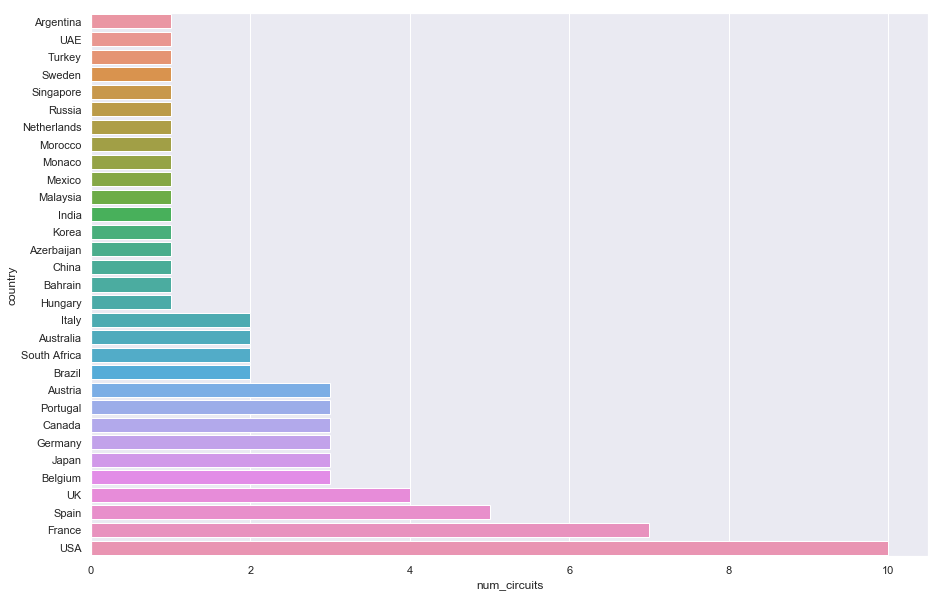

In [16]:
# How many circuits in each country 
num_circuits = constructor.groupby('country')['circuitRef'].nunique()
num_circuits_df = num_circuits.rename_axis('country').reset_index(name='num_circuits')
num_circuits_df = num_circuits_df.sort_values(['num_circuits'], ascending=True).reset_index(drop=True)
plt.figure(figsize=(15,10))
sns.barplot(y='country', x='num_circuits', data=num_circuits_df);

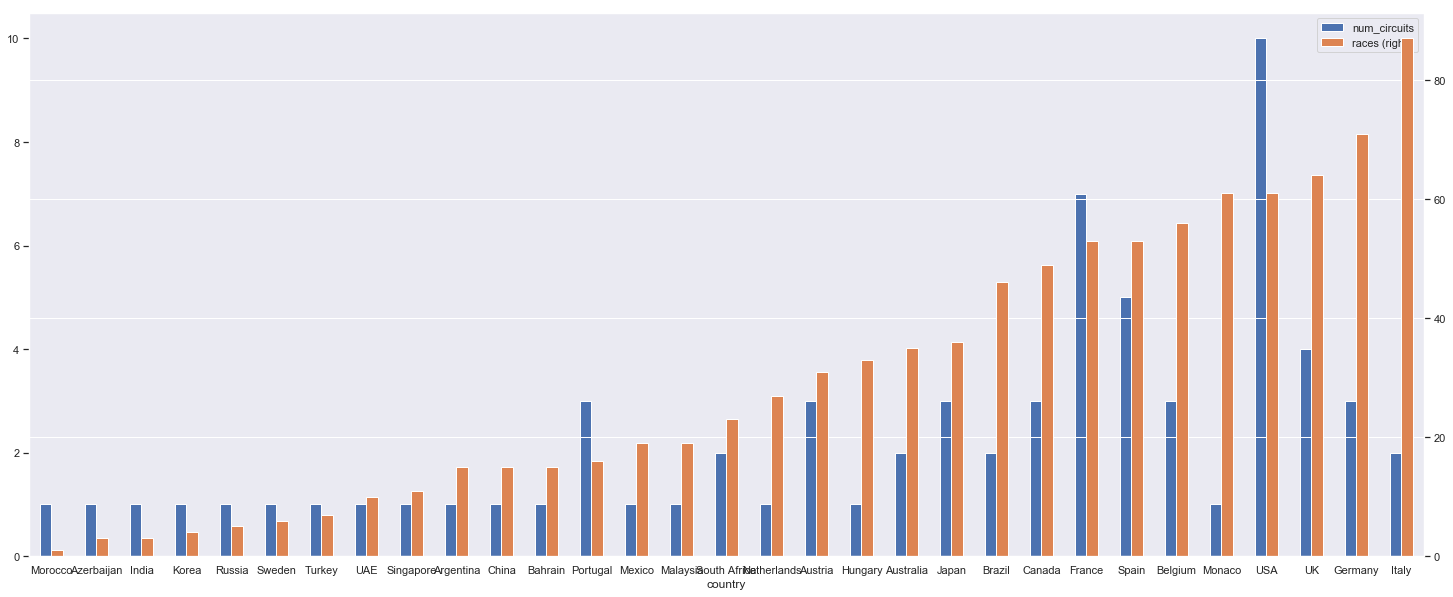

In [17]:
# Compare number of circuits in a country to Races held by country
circuit_races = num_circuits_df.merge(country_df, on='country', how='inner')
circuit_races = circuit_races.sort_values(['races'], ascending=True).reset_index(drop=True)
circuit_races.plot(kind='bar', x='country',secondary_y= 'races', rot= 0, figsize=(25, 10));

In [18]:
# Explore circuit locations 
by_coord = constructor.groupby(['lat','lng','circuitRef'])['raceId'].nunique()
by_coord_df = by_coord.rename_axis(['lat','lon', 'circuit']).reset_index(name='races')
by_coord_df = by_coord_df .sort_values(['races']).reset_index(drop=True)

In [19]:
# Plot the location of each circuit and represent the size by number of races at each circuit.
# Make an empty map using folium
m = folium.Map(location=[20,0], tiles="Mapbox Bright", zoom_start=2)
 
#  add marker one by one on the map
for i in range(0,len(by_coord_df)):
   folium.Circle(
      location=[by_coord_df.iloc[i]['lat'], by_coord_df.iloc[i]['lon']],
      popup=by_coord_df.iloc[i]['circuit'],
      radius=int(by_coord_df.iloc[i]['races']*5000),
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)
m

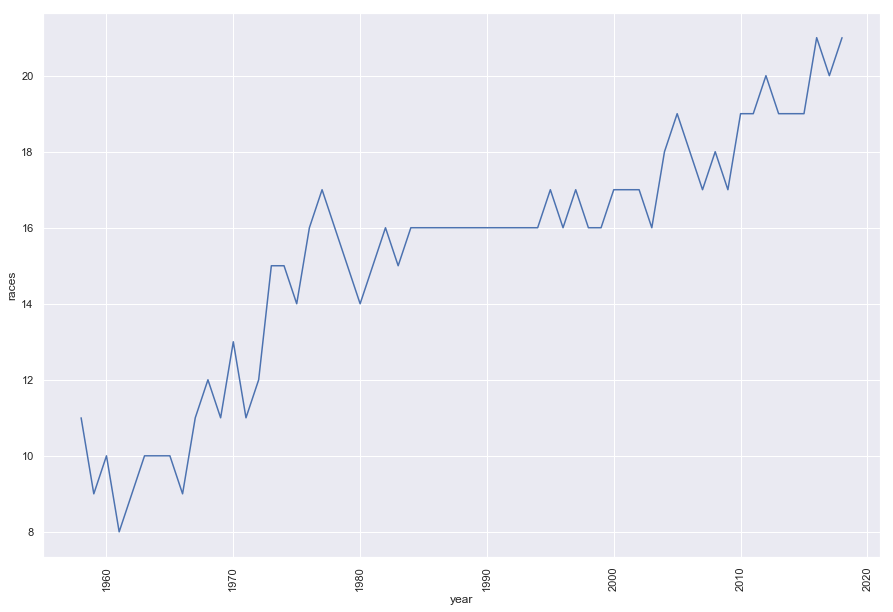

In [20]:
# How many total races have been held each year?
years = constructor.groupby('year')['raceId'].nunique()
years_df = years.rename_axis('year').reset_index(name='races')
years_df = years_df[years_df['year'] < 2019] 
years_df = years_df.sort_values(['races'], ascending=True).reset_index(drop=True)
plt.figure(figsize=(15,10))
plt.xticks(rotation=90);
sns.lineplot(x='year', y='races', data=years_df);

In [21]:
# How have the points been distributed over the last 10 years across constructors
num_points = constructor.groupby(['constructorRef','year'])['points'].max()
num_points_df = num_points.rename_axis(['constructor', 'year']).reset_index(name='points')
num_points_last10 = num_points_df[(num_points_df['year'] > 2007) & (num_points_df['points'] > 0)]
num_points_last10 = num_points_last10.sort_values(['year'], ascending=True).reset_index(drop=True)

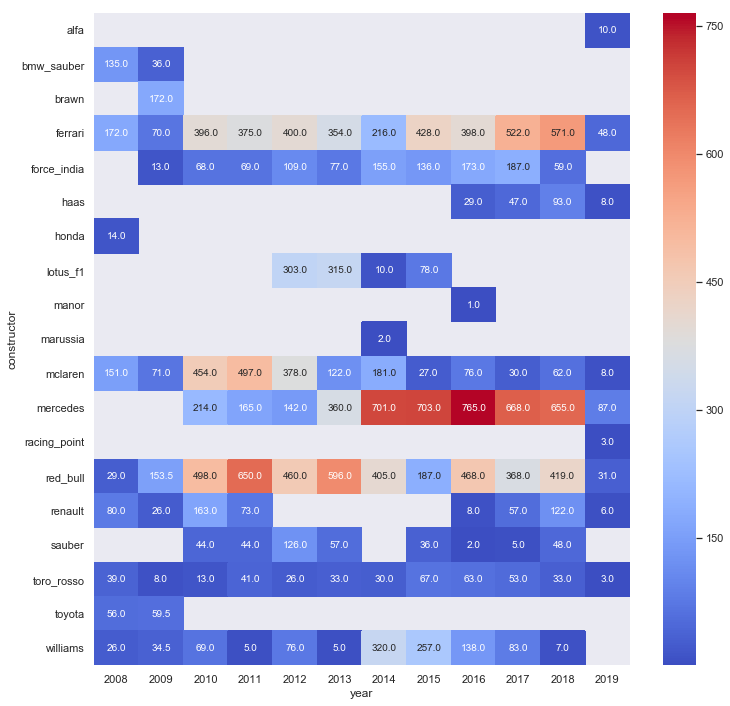

In [22]:
hmap = num_points_last10.pivot_table(index='constructor', values='points', columns='year')
plt.figure(figsize=(12,12));
sns.heatmap(hmap, cmap='coolwarm', center=380, annot=True, fmt=".1f", annot_kws={'size':10},);

In [23]:
# How have the wins (position 1) been distributed over the last 10 years across constructors with at least 1 win
num_wins = constructor.groupby(['constructorRef','year'])['wins'].max()
num_wins_df = num_wins.rename_axis(['constructor', 'year']).reset_index(name='wins')
num_wins_last10 = num_wins_df[(num_wins_df['year'] > 2007) & (num_wins_df['wins'] > 0) ]
num_wins_last10 = num_wins_last10.sort_values(['year'], ascending=True).reset_index(drop=True)

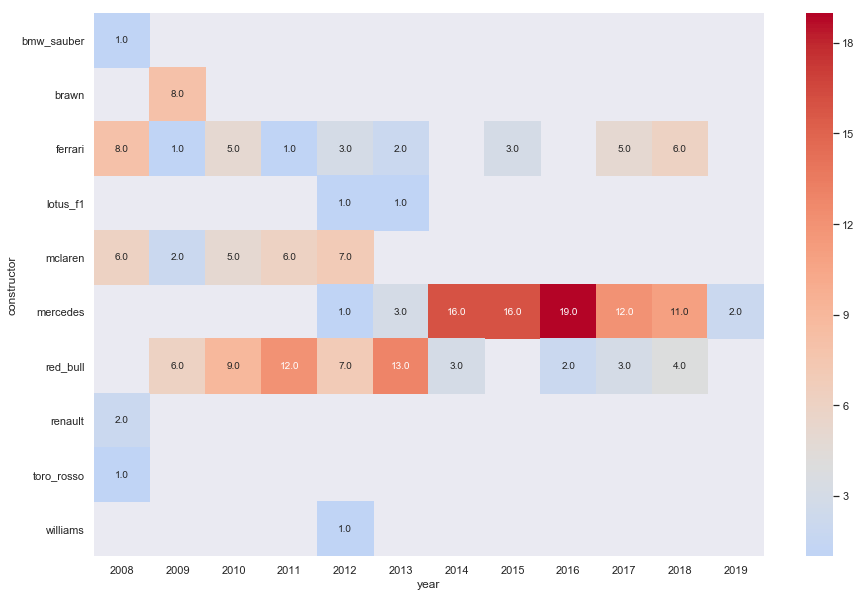

In [24]:
win_hmap = num_wins_last10.pivot_table(index='constructor', values='wins', columns='year')
plt.figure(figsize=(15,10))
sns.heatmap(win_hmap, cmap='coolwarm', center= 4, annot=True, fmt=".1f", annot_kws={'size':10});
plt.yticks(rotation=0);

In [25]:
# Races Data Exploration

In [26]:
#Import Data
races = pd.read_csv('results_full.csv')

In [27]:
#Analysis of Racer Data
races = races.replace('\\N', 0)
races.head()

,Unnamed: 0,resultId,raceId,driverId,constructorId,grid,positionText,positionOrder,points,laps,...,nationality_x,year,round,date,circuitRef,location,country,constructorRef,nationality_y,position_quali
0,0,1,18,1,1,1,1,1,10.0,58,...,British,2008,1,3/16/2008,albert_park,Melbourne,Australia,mclaren,British,1.0
1,1,5,18,5,1,3,5,5,4.0,58,...,Finnish,2008,1,3/16/2008,albert_park,Melbourne,Australia,mclaren,British,3.0
2,2,371,36,1,1,4,3,3,6.0,58,...,British,2007,1,3/18/2007,albert_park,Melbourne,Australia,mclaren,British,4.0
3,3,370,36,4,1,2,2,2,8.0,58,...,Spanish,2007,1,3/18/2007,albert_park,Melbourne,Australia,mclaren,British,2.0
4,4,20352,338,1,1,11,6,6,8.0,58,...,British,2010,2,3/28/2010,albert_park,Melbourne,Australia,mclaren,British,11.0


In [28]:
#How many unique drivers have we had in F1?
drivers = races.groupby(['driverRef'])['driverRef'].nunique()
drivers.count()

847

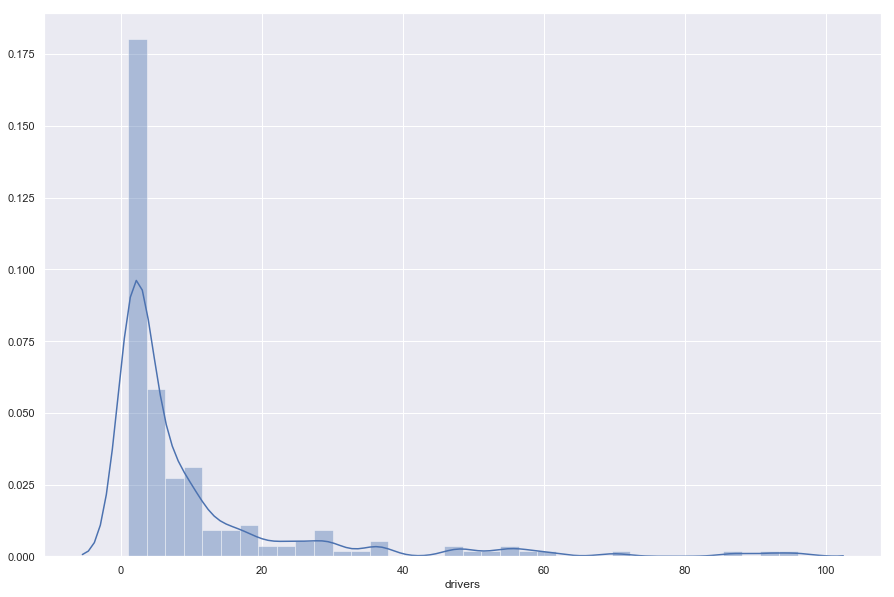

In [29]:
# How many unique drivers has each constructor employed?
drivers_per_constructor = races.groupby('constructorRef')['driverRef'].nunique()
drivers_per_constructor_df = drivers_per_constructor.rename_axis('constructor').reset_index(name='drivers')
drivers_per_constructor_df = drivers_per_constructor_df.sort_values(['drivers'], ascending = True).reset_index(drop=True)
plt.figure(figsize=(15,10))
sns.distplot(drivers_per_constructor_df['drivers']);

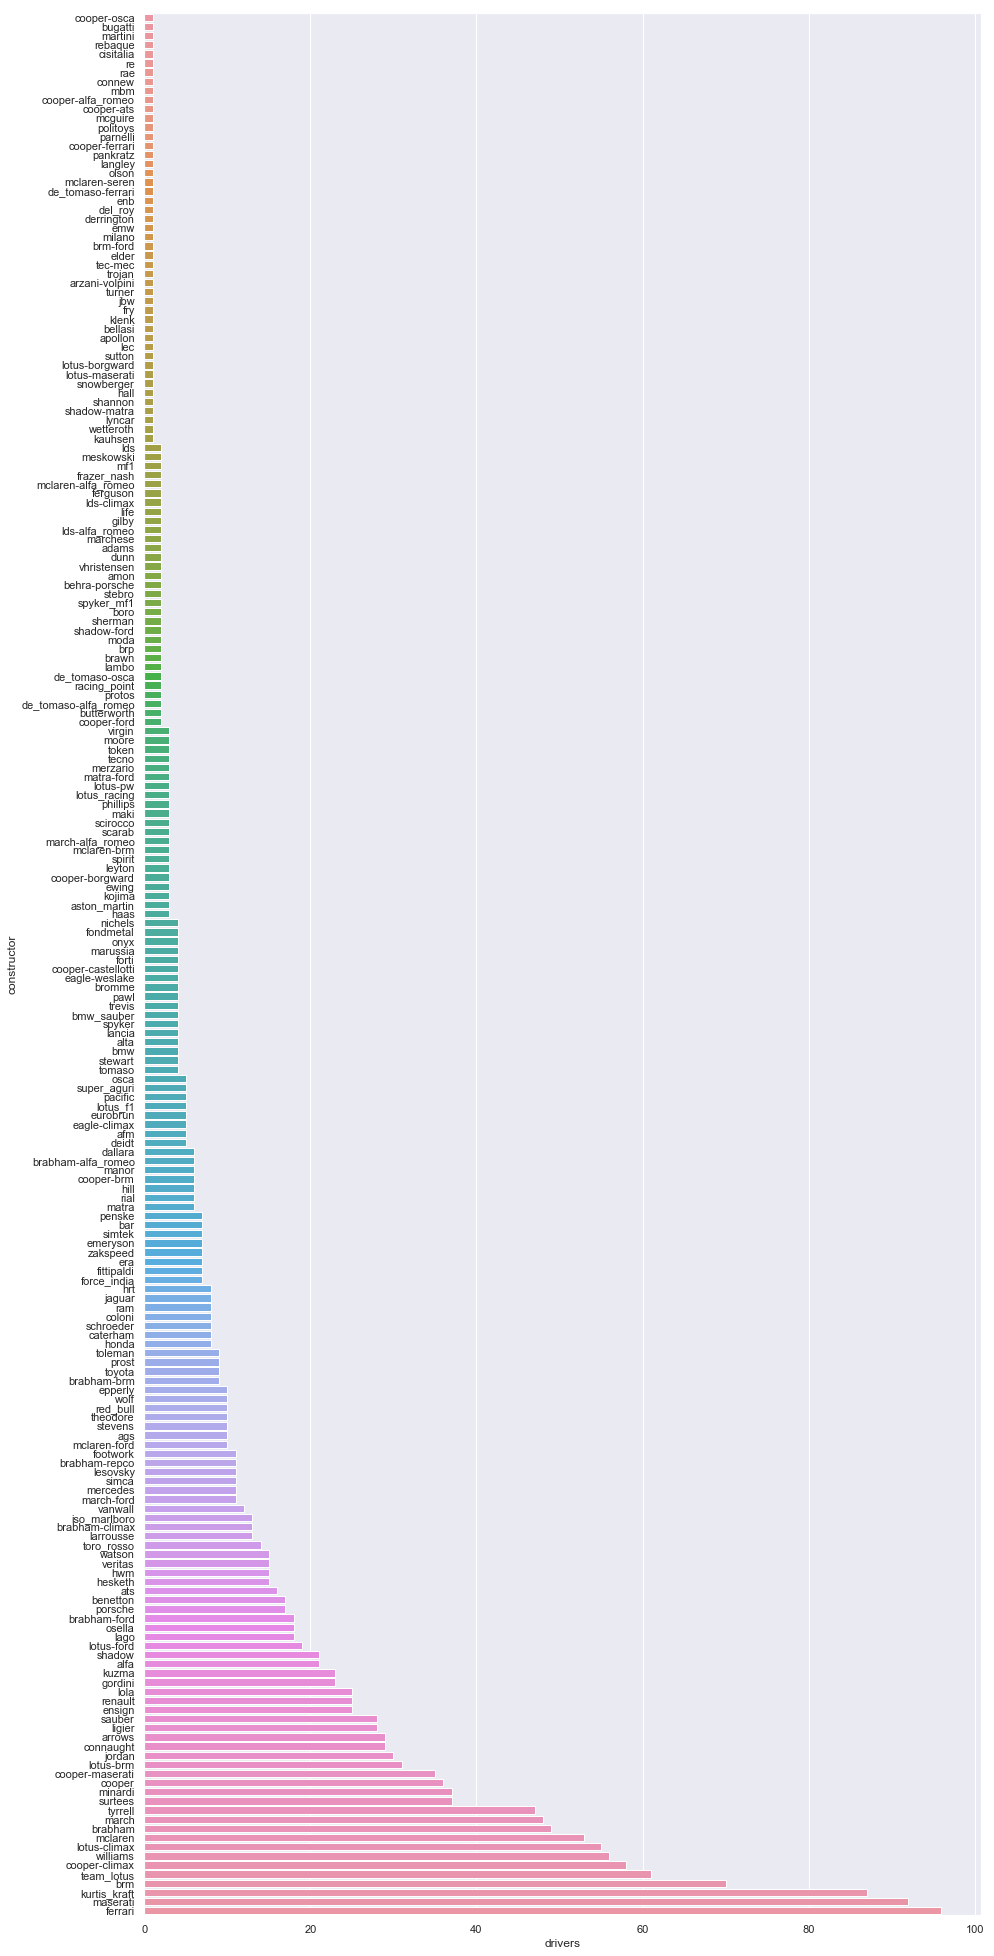

In [30]:
plt.figure(figsize=(15,35))
sns.barplot(y='constructor', x='drivers', data=drivers_per_constructor_df);

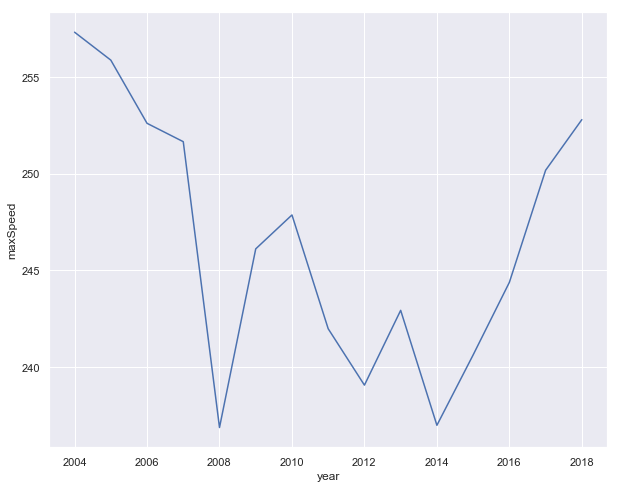

In [31]:
# Maximum Speed By Year
races.fastestLapSpeed = races.fastestLapSpeed.astype(float)
speed = races.groupby('year')['fastestLapSpeed'].max()
speed_df = speed.rename_axis('year').reset_index(name='maxSpeed')
speed_df = speed_df[(speed_df['year'] < 2019) & (speed_df['maxSpeed'] > 0)] 
plt.figure(figsize=(10,8))
sns.lineplot(x='year', y='maxSpeed', data=speed_df);

In [32]:
# Laps per Driver
driver_laps = races.groupby(['driverRef'])['laps'].sum()
driver_laps_df = driver_laps.rename_axis(['driver']).reset_index(name='laps')
driver_laps_df = driver_laps_df.sort_values(['laps'], ascending=False).reset_index(drop=True)

In [33]:
# Total Laps driven in F1?
driver_laps_df['laps'].sum()

1100764

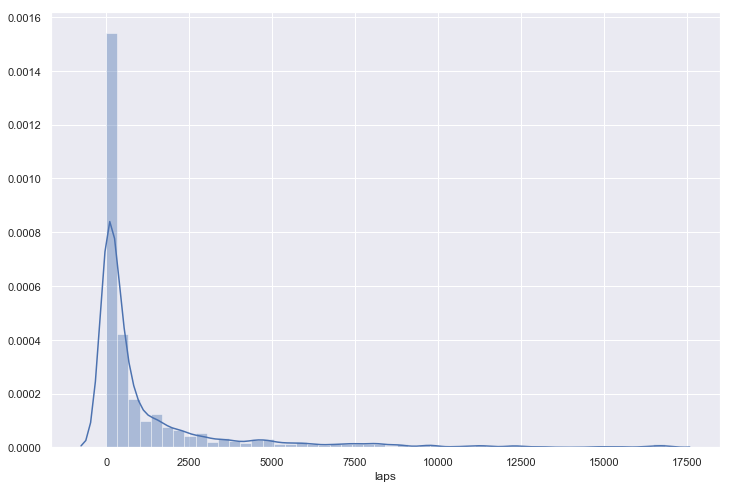

In [57]:
#Distribution of laps by driver
plt.figure(figsize=(12,8))
sns.distplot(driver_laps_df['laps']);

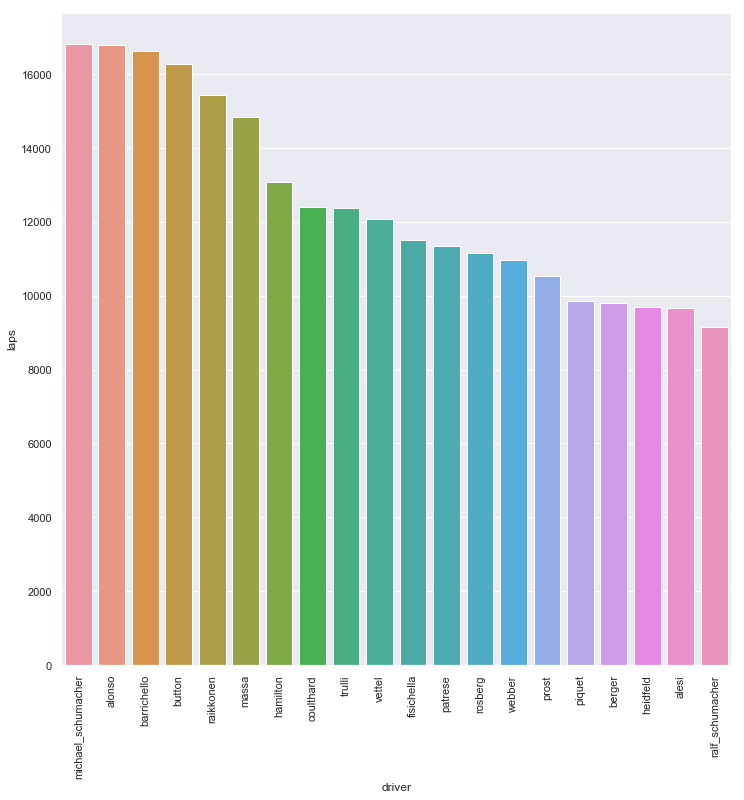

In [37]:
# Who are the top 20 drivers to have the most laps?
plt.figure(figsize=(12,12))
plt.xticks(rotation=90)
sns.barplot(y='laps', x='driver', data=driver_laps_df.head(20));

In [38]:
# How have the wins (position 1) been distributed over the last 10 years across constructors with at least 1 win
num_pts = races.groupby(['driverRef','year'])['points'].sum()
num_pts_df = num_pts.rename_axis(['driver', 'year']).reset_index(name='points')
num_pts_last10 = num_pts_df[(num_pts_df['year'] > 2007) & (num_pts_df['points'] > 10) ]
num_pts_last10 = num_pts_last10.sort_values(['year'], ascending=True).reset_index(drop=True)

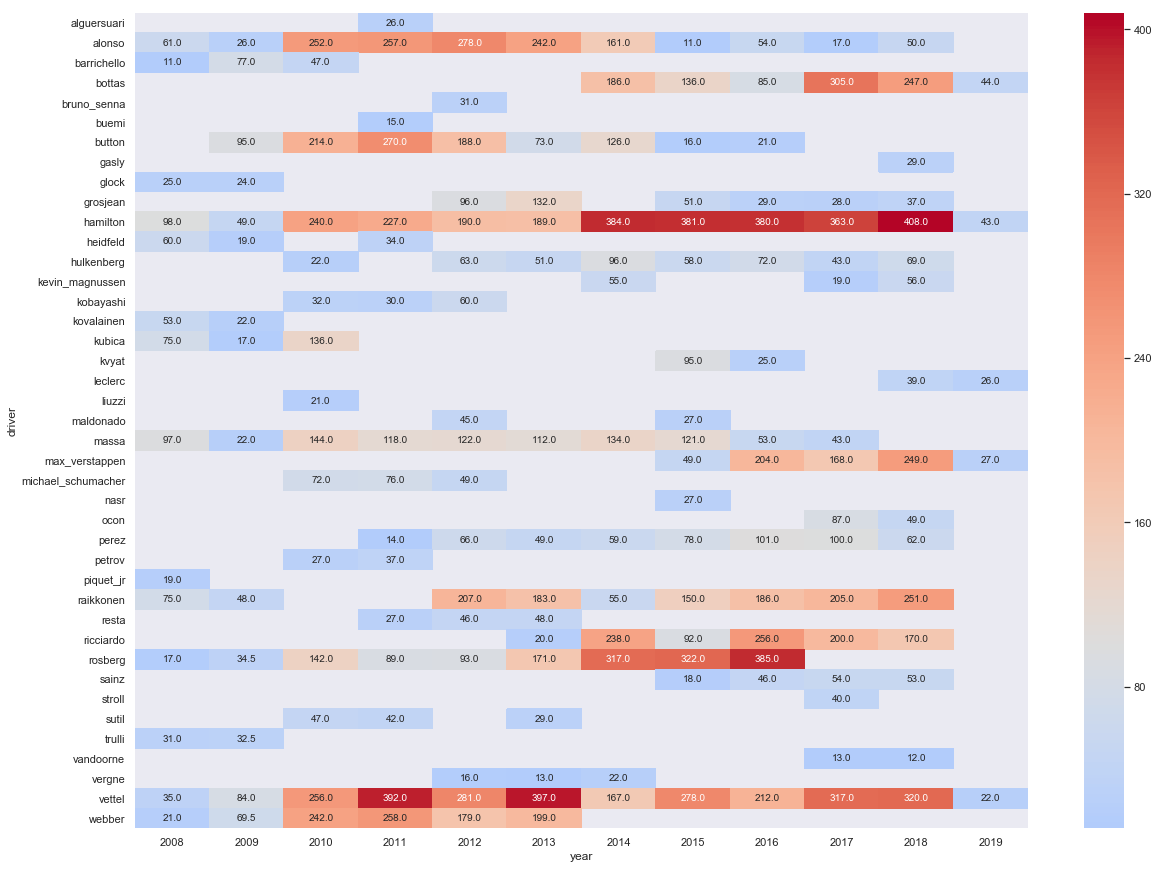

In [39]:
pts_hmap = num_pts_last10.pivot_table(index='driver', values='points', columns='year')
plt.figure(figsize=(20,15))
sns.heatmap(pts_hmap, cmap='coolwarm', center= 100, annot=True, fmt=".1f", annot_kws={'size':10});
plt.yticks(rotation=0);

In [40]:
# Nationalities of Drivers
driver_nationality = races.groupby(['nationality_x'])['driverRef'].nunique()
driver_nationality_df = driver_nationality.rename_axis(['nationality']).reset_index(name='drivers')
driver_nationality_df = driver_nationality_df.sort_values(['drivers'], ascending=True).reset_index(drop=True)

In [41]:
# How many countries have drivers come from?
driver_nationality_df['nationality'].count()

41

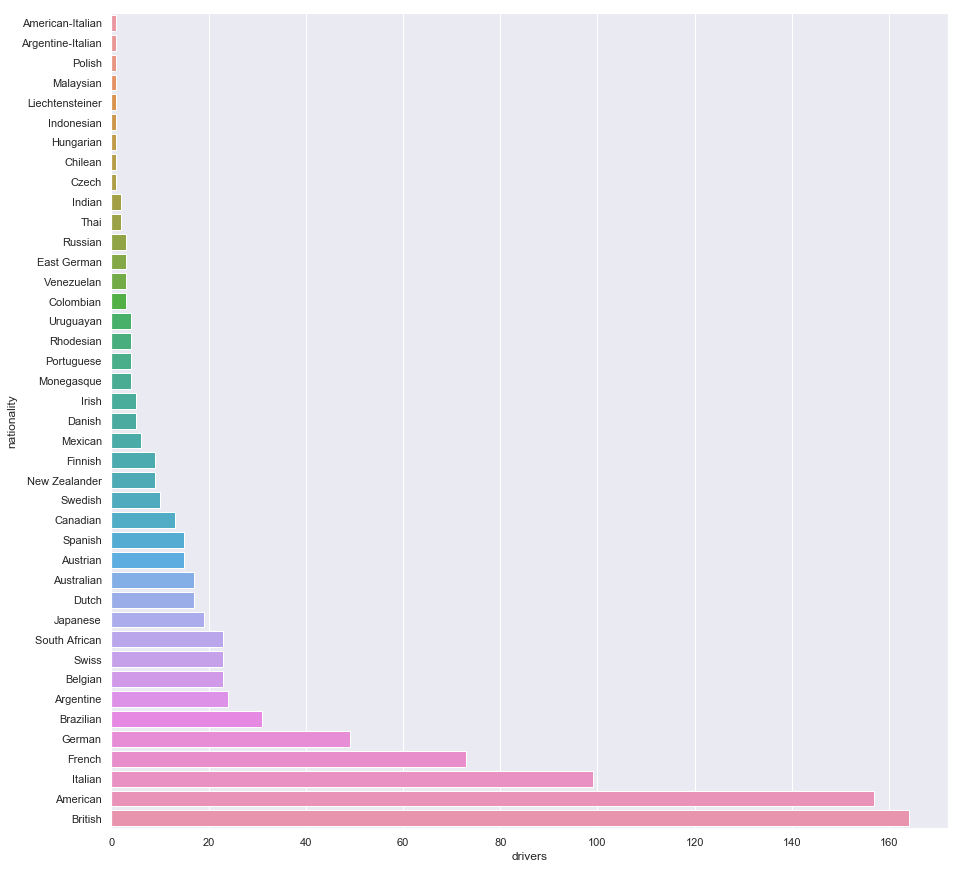

In [42]:
# How many drivers per each represented country?
plt.figure(figsize=(15,15))
sns.barplot(y='nationality', x='drivers', data=driver_nationality_df);

In [43]:
# Most #1 Qualifications
num_q1s = races.groupby(['driverRef','position_quali'])['raceId'].nunique()
num_q1s_df = num_q1s.rename_axis(['driver', 'quali']).reset_index(name='front_rows')
num_q1s_df = num_q1s_df[(num_q1s_df['quali'] <= 1.0)]

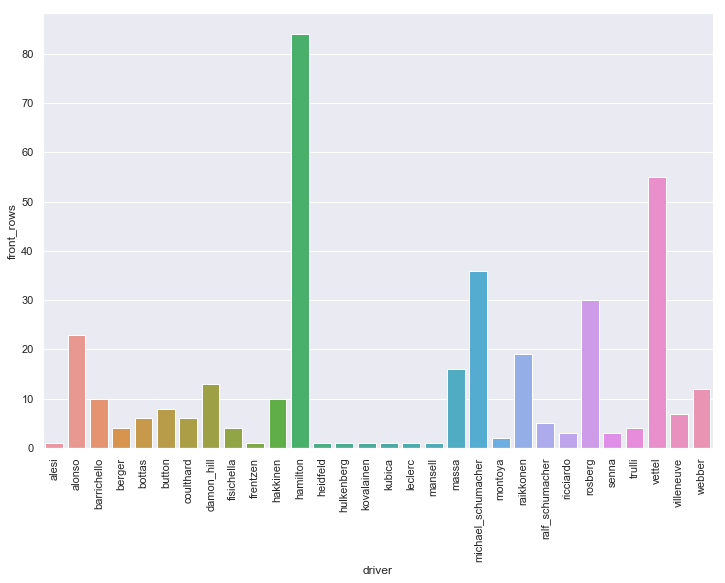

In [44]:
# Which drivers have qualified in 
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.barplot(y='front_rows', x='driver', data=num_q1s_df);

In [45]:
# Most Position #1 Finishes
num_p1s = races.groupby(['driverRef','positionOrder'])['raceId'].nunique()
num_p1s_df = num_p1s.rename_axis(['driver', 'finalpos']).reset_index(name='races_won')
num_p1s_df = num_p1s_df[(num_p1s_df['finalpos'] <= 1.0)]

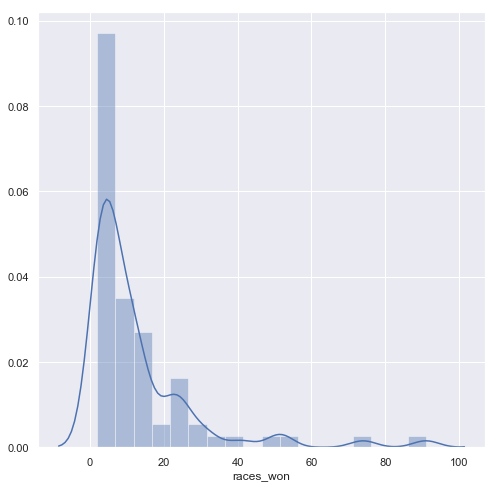

In [55]:
# Distribution of Positions 1 Wins
plt.figure(figsize=(8,8))
sns.distplot(num_p1s_df['races_won']);

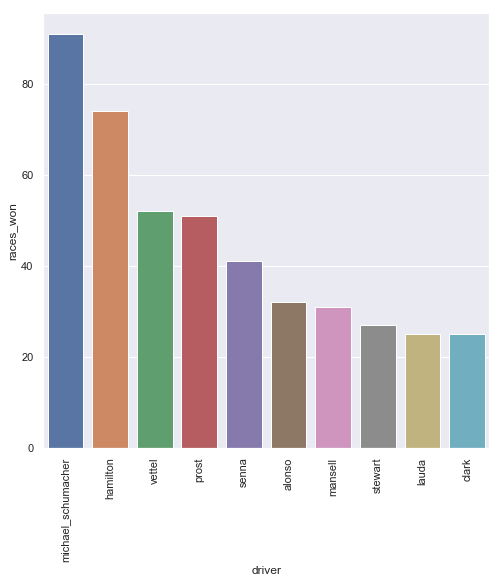

In [47]:
# Top 10 race winners of all time
num_p1s_df = num_p1s_df[(num_p1s_df['races_won'] > 1)]
num_p1s_df = num_p1s_df.sort_values(['races_won'], ascending=False).reset_index(drop=True)
plt.figure(figsize=(8,8))
plt.xticks(rotation=90)
sns.barplot(y='races_won', x='driver', data=num_p1s_df.head(10));

In [48]:
# Top Status (>99) at the end of Races
status = races.groupby('status')['raceId'].count()
status_df = status.rename_axis('status').reset_index(name='frequency').sort_values(['frequency'], ascending = False)
status_df_100 = status_df[status_df['frequency'] > 99] 

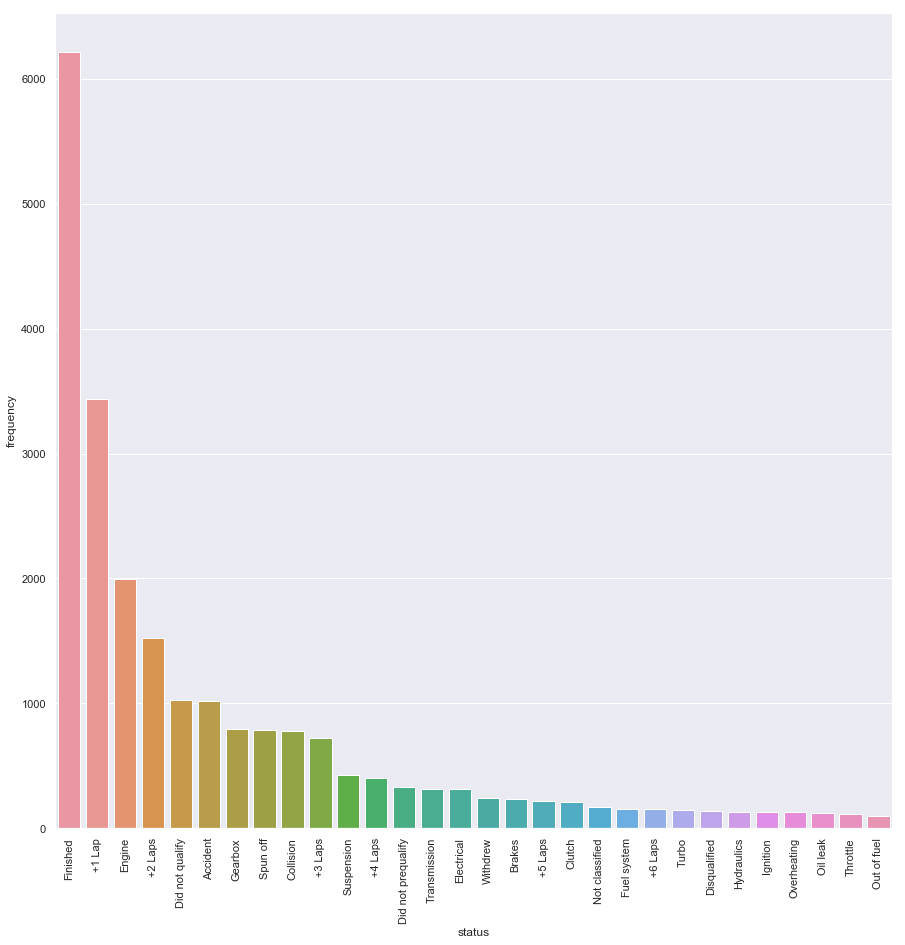

In [49]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90);
sns.barplot(y='frequency', x='status', data=status_df_100);

In [50]:
# Worst Luck

status_by_driver = races.groupby(['driverRef','status'])['raceId'].count()
status_by_driver_df = status_by_driver.rename_axis(['driver','status']).reset_index(name='frequency').sort_values(['frequency'], ascending = False)
status_by_driver_df = status_by_driver_df[(status_by_driver_df['status'] != 'Finished') & (status_by_driver_df['status'] != '+1 Lap')] 
status_by_driver_df.reset_index().drop(columns='index')
worst_race = status_by_driver_df.groupby(['driver'])['frequency'].sum()
worst_race_df = worst_race.rename_axis(['driver']).reset_index(name='frequency').sort_values(['frequency'], ascending = False)

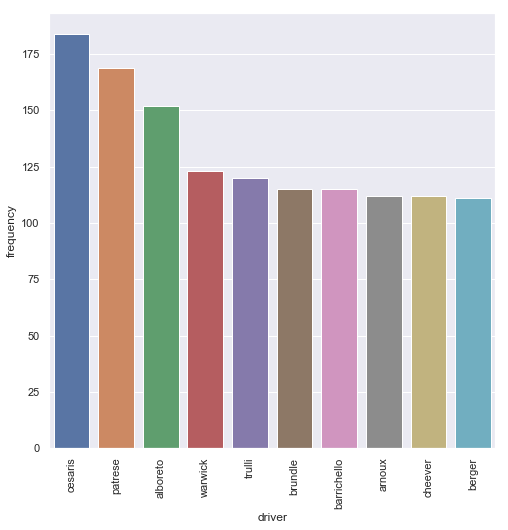

In [51]:
# Which drivers have had the worst luck with races - did not finish less than 1 lap behind.
plt.figure(figsize=(8,8))
plt.xticks(rotation=90)
sns.barplot(y='frequency', x='driver', data=worst_race_df.head(10));

In [52]:
#fastest speed distribution by circuit

circuit_speed = races.groupby(['circuitRef','fastestLapSpeed'])['fastestLapSpeed'].count()
circuit_speed_df = circuit_speed.rename_axis(['circuit', 'maxSpeed']).reset_index(name='count')
circuit_speed_df = circuit_speed_df[circuit_speed_df['maxSpeed'] > 0] 
circuit_speed_df = circuit_speed_df.drop(columns='count')
speed_summary = circuit_speed_df.groupby('circuit')['maxSpeed'].describe()
speed_summary

,count,mean,std,min,25%,50%,75%,max
circuit,,,,,,,,
BAK,60.0,201.660617,3.360719,190.963,200.17300,201.6860,203.64325,208.919
albert_park,307.0,212.321440,8.499844,129.626,208.23800,213.4520,217.42600,226.933
americas,139.0,194.214683,7.301144,130.623,191.58600,195.5850,197.61700,203.782
bahrain,306.0,201.832928,6.870460,175.295,198.14025,203.2290,206.26575,216.074
buddh,66.0,205.005576,8.374463,143.014,204.36075,206.7585,207.97600,211.463
catalunya,302.0,196.743993,10.732740,177.877,187.83650,194.6595,203.42750,220.213
fuji,41.0,191.804805,15.625918,130.749,181.73800,185.5900,206.47000,209.456
hockenheimring,190.0,210.159689,8.808026,122.470,206.11000,211.4885,214.96925,223.182
hungaroring,308.0,185.916591,7.723109,145.415,181.72150,186.3645,191.40600,199.461


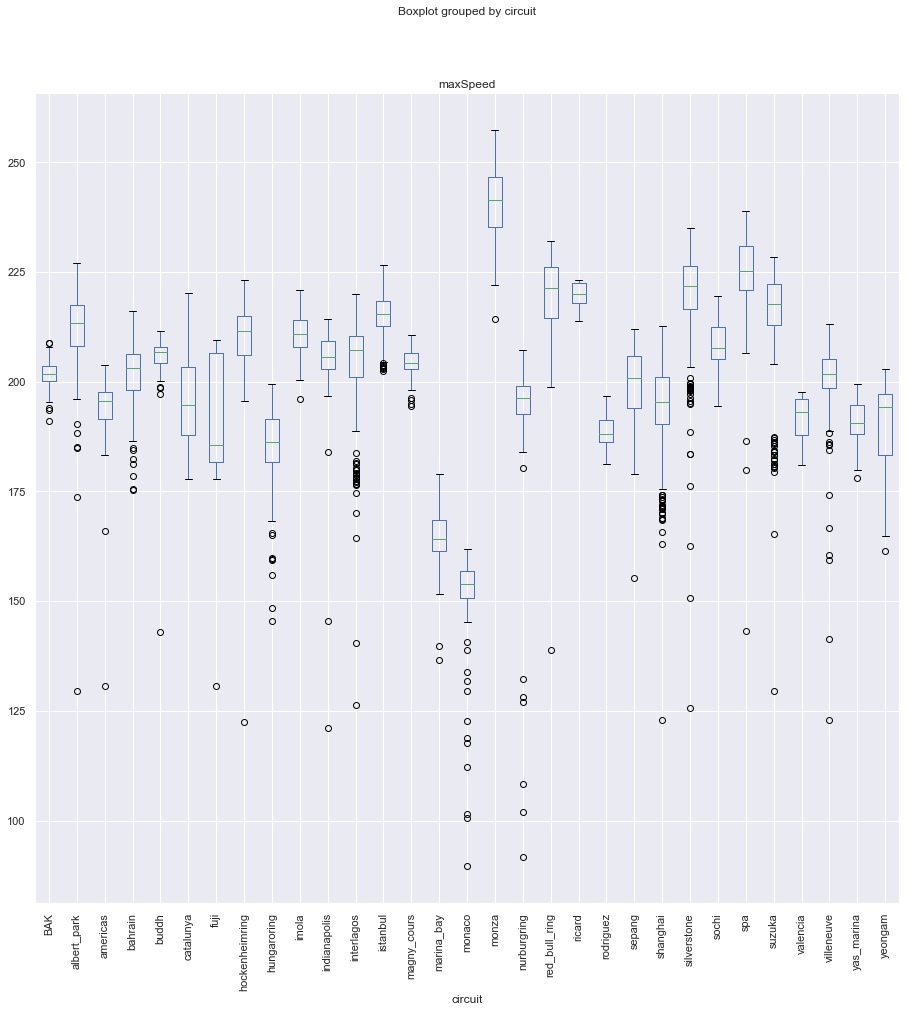

In [53]:
circuit_speed_df.boxplot(column=['maxSpeed'], by='circuit', figsize=(15,15), rot=90);

In [54]:
# More future ideas for the Race Data:

# start and stop ages of drivers over the years
# avg pitstops over the year (from other data set not yet explored)
# quali position vs final position correlation analysis
# feature selection
# clustering
# prediction of outcomes based on features